### Review telemetry and cheta-converted telemetry for HRMA wide-range readout change

In [1]:
%matplotlib inline

In [2]:
import os
os.environ['SKA'] = '/proj/sot/ska'
import sys
from pathlib import Path
sys.path.insert(0, str(Path.home() / "git" / "cheta"))
from astropy.io import fits
import cheta
from cheta.converters import *
from chandra_time import DateTime
import matplotlib.pyplot as plt
from ska_matplotlib import plot_cxctime
from cxotime import CxoTime

In [3]:
cheta.__version__

'4.61.3.dev15+ge7b6eb0'

In [4]:
obc_file = "obcf829222640N001_4_eng0.fits.gz"
tel_file = "telf829222640N001_2_eng0.fits.gz"

In [5]:
with fits.open(tel_file) as hdus:
    tel = hdus[1].data[:]

In [6]:
len(tel)

200

In [7]:
'4OAVOBAT' in tel.dtype.names

True

In [8]:
'4OAVHRMT' in tel.dtype.names

True

In [9]:
ok = tel['TIME'] < CxoTime("2024:102:11:58:00.000")

Plot the unmodified averages for these msids and wide versions

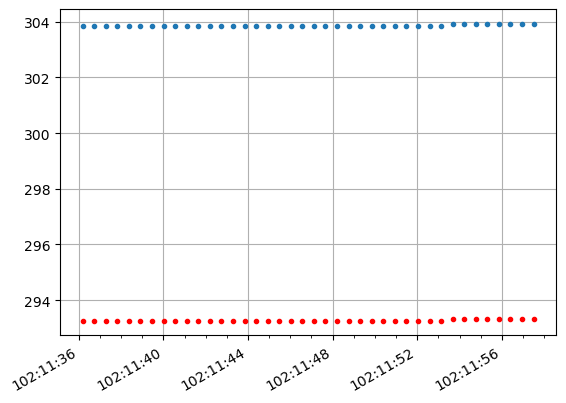

In [10]:
plot_cxctime(tel['TIME'][ok], tel['4OAVOBAT'][ok], '.', color='r', label='4OAVOBAT');
plot_cxctime(tel['TIME'][ok], tel['4OAVOBAT_WIDE'][ok], '.', label='4OAVOBAT_WIDE');
plt.grid('True');
plt.show()

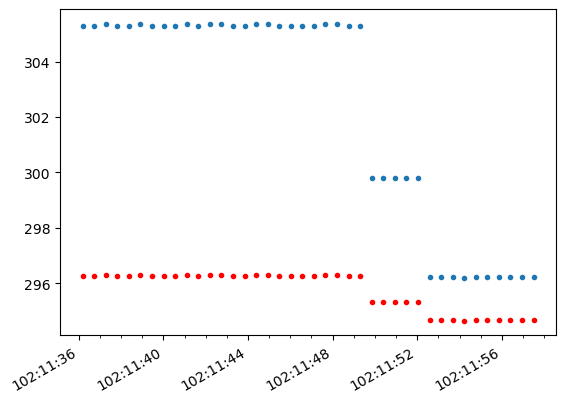

In [11]:

plot_cxctime(tel['TIME'][ok], tel['4OAVHRMT'][ok], '.', color='r', label='4OAVHRMT');
plot_cxctime(tel['TIME'][ok], tel['4OAVHRMT_WIDE'][ok], '.', label='4OAVHRMT_WIDE');



In [12]:
# Run the updated converter
ntel = numpy_converter(tel)
tel = tel2eng(ntel)

In [13]:
ok = tel['TIME'] < CxoTime("2024:102:11:58:00.000")

Show in plots that the converted / values copied from the _WIDE mode msid happen at the correct times.

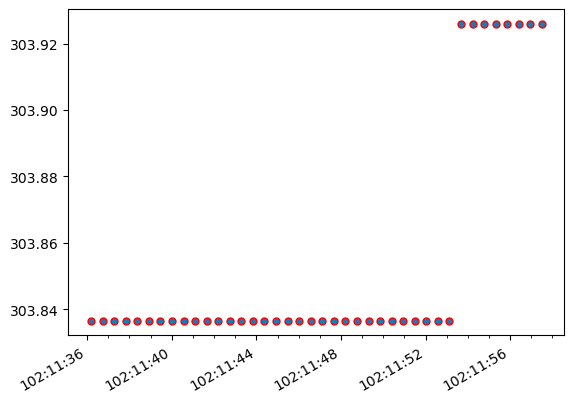

In [14]:
# expectation no changes (2017 patch)
plot_cxctime(tel['TIME'][ok], tel['4OAVOBAT'][ok], '.', color='r', markersize=10, label='4OAVOBAT');
plot_cxctime(tel['TIME'][ok], tel['4OAVOBAT_WIDE'][ok], '.', label='4OAVOBAT_WIDE');

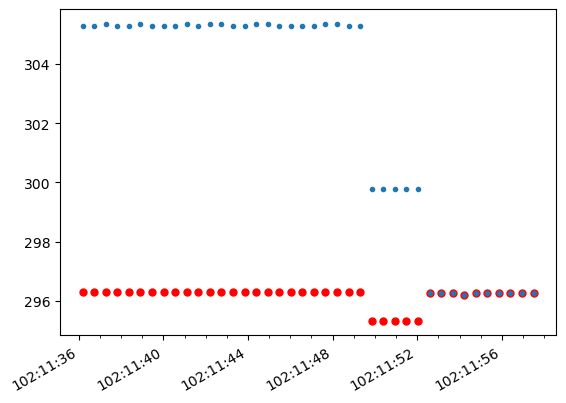

In [15]:
# expectation is that last bit of data will be double-dots and rest not.
plot_cxctime(tel['TIME'][ok], tel['4OAVHRMT'][ok], '.', color='r', markersize=10, label='4OAVHRMT');
plot_cxctime(tel['TIME'][ok], tel['4OAVHRMT_WIDE'][ok], '.', label='4OAVHRMT_WIDE');


Confirm conversion for thermistor data.

In [16]:
with fits.open(obc_file) as hdus:
    dat = hdus[1].data[:]

In [17]:
len(dat)

200

In [18]:
ok = dat['TIME'] < CxoTime("2024:102:11:58:00.000")

Plot unmodified msids and WIDE mode versions for three msids impacted by patches 'c', 'd', and 'e' in 
cheta.converters.obc4eng .

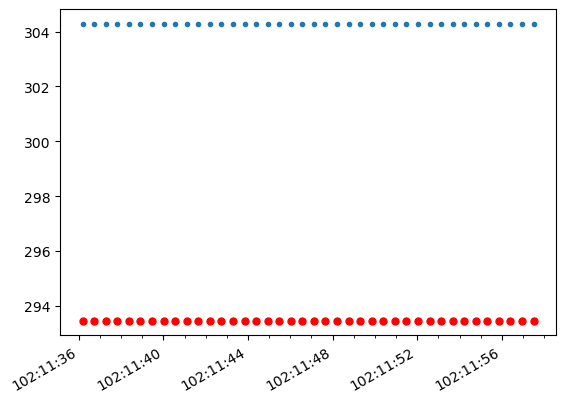

In [19]:
msid = 'OOBTHR05'
plot_cxctime(dat['TIME'][ok], dat[msid][ok], '.', color='r', markersize=10);
plot_cxctime(dat['TIME'][ok], dat[msid + "_WIDE"][ok], '.');

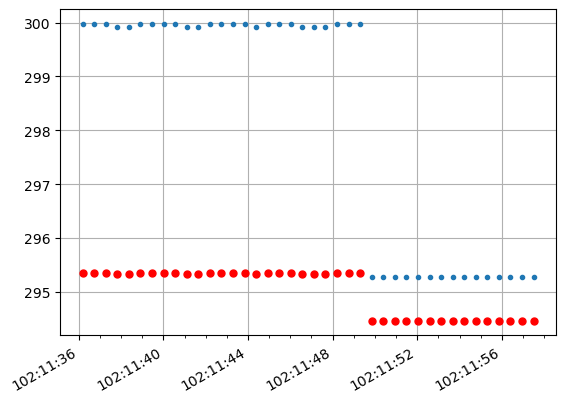

In [20]:
msid = 'OHRTHR03'
plot_cxctime(dat['TIME'][ok], dat[msid][ok], '.', color='r', markersize=10);
plot_cxctime(dat['TIME'][ok], dat[msid + "_WIDE"][ok], '.');
plt.grid("True")

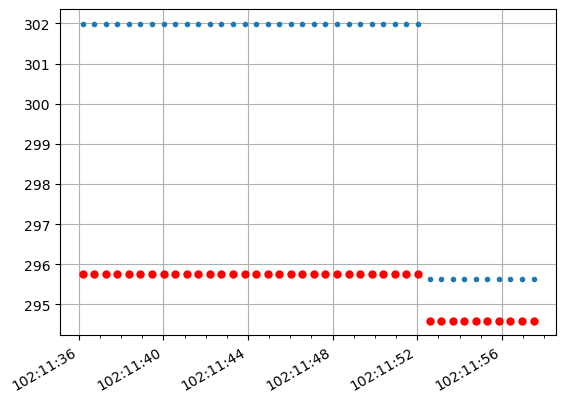

In [21]:
msid = 'OHRTHR62'
plot_cxctime(dat['TIME'][ok], dat[msid][ok], '.', color='r', markersize=10);
plot_cxctime(dat['TIME'][ok], dat[msid + "_WIDE"][ok], '.');
plt.grid("True")

Run the test converter code.

In [22]:
ndat = numpy_converter(dat)
dat = obc4eng(ndat)

In [23]:
# Confirm an msid in patch c shows identical values and no change during this time range
dat['OOBTHR02'] - dat['OOBTHR02_WIDE']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
# Confirm an msid in patch "e" shows a transition.
dat['OHRTHR62'] - dat['OHRTHR62_WIDE']

array([-6.2235413, -6.2235413, -6.2235413, -6.2235413, -6.2235413,
       -6.2235413, -6.2235413, -6.2235413, -6.2235413, -6.2235413,
       -6.2235413, -6.2235413, -6.2235413, -6.2235413, -6.2235413,
       -6.2235413, -6.2235413, -6.2235413, -6.2235413, -6.2235413,
       -6.2235413, -6.2235413, -6.2235413, -6.2235413, -6.2235413,
       -6.2235413, -6.2235413, -6.2235413, -6.2235413, -6.2235413,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.    

Plot the cheta corrected values in this time range.

In [25]:
ok = dat['TIME'] < CxoTime("2024:102:11:58:00.000")

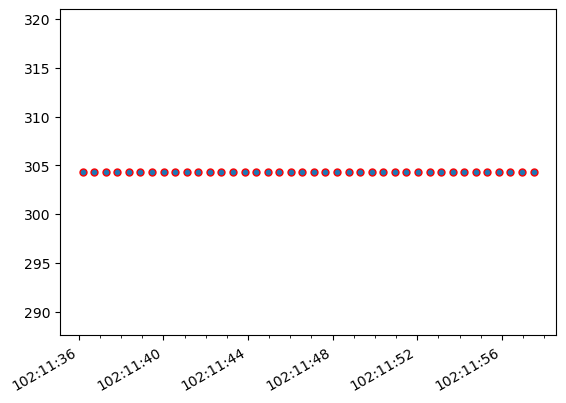

In [26]:
# 2017 patch, no change expected
msid = 'OOBTHR05'
plot_cxctime(dat['TIME'][ok], dat[msid][ok], '.', color='r', markersize=10);
plot_cxctime(dat['TIME'][ok], dat[msid + "_WIDE"][ok], '.');

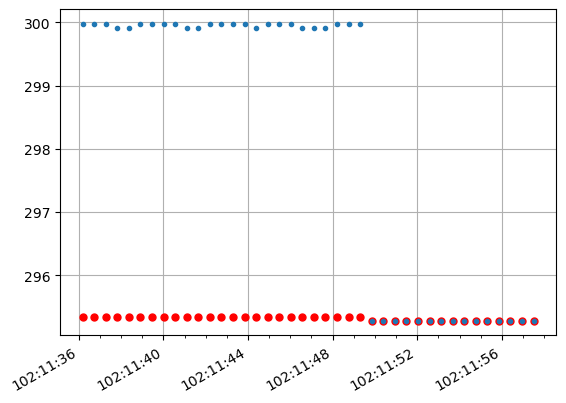

In [27]:
# Expectation = last 15 points are the same
msid = 'OHRTHR03'
plot_cxctime(dat['TIME'][ok], dat[msid][ok], '.', color='r', markersize=10);
plot_cxctime(dat['TIME'][ok], dat[msid + "_WIDE"][ok], '.');
plt.grid("True")

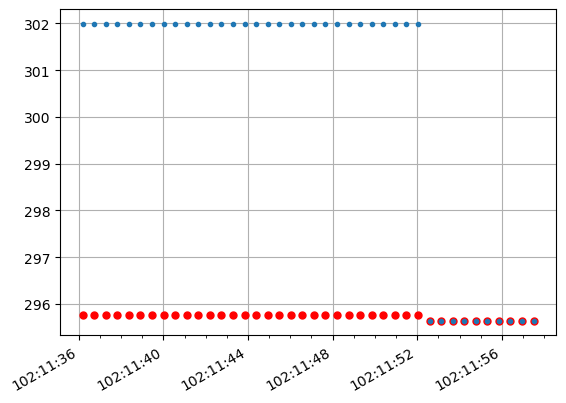

In [28]:
# Expectation = last 10 points are the same
msid = 'OHRTHR62'
plot_cxctime(dat['TIME'][ok], dat[msid][ok], '.', color='r', markersize=10);
plot_cxctime(dat['TIME'][ok], dat[msid + "_WIDE"][ok], '.');
plt.grid("True")